In [163]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import bias_variance_decomp
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [164]:
df = pd.read_csv("cereal.csv",sep=";")

In [165]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [166]:
df = df.iloc[1:]
df.drop(["name"],axis=1,inplace=True)

In [167]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [168]:
df = df.astype({'calories':'float', 'protein':'float', 'fat':'float', 'sodium':'float', 'fiber':'float', 'carbo':'float',
       'sugars':'float', 'potass':'float', 'vitamins':'float', 'shelf':'float', 'weight':'float', 'cups':'float', 'rating':'float'})
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70.000,4.000,1.000,130.000,10.000,5.000,6.000,280.000,25.000,3.000,1.000,0.330,68.403
2,Q,C,120.000,3.000,5.000,15.000,2.000,8.000,8.000,135.000,0.000,3.000,1.000,1.000,33.984
3,K,C,70.000,4.000,1.000,260.000,9.000,7.000,5.000,320.000,25.000,3.000,1.000,0.330,59.426
4,K,C,50.000,4.000,0.000,140.000,14.000,8.000,0.000,330.000,25.000,3.000,1.000,0.500,93.705
5,R,C,110.000,2.000,2.000,200.000,1.000,14.000,8.000,-1.000,25.000,3.000,1.000,0.750,34.385


In [169]:
df['sodium2'] = df['sodium'].apply(lambda x:float(x*2) + np.random.normal(0,5,1))
df['sodium2'] = df['sodium2'].astype("float")

In [170]:
columns = df.columns
columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'sodium2'],
      dtype='object')

In [171]:
df = pd.get_dummies(df, columns=['mfr','type'])
df.dropna(inplace=True)

In [172]:
X = df.drop(["rating"],axis=1,inplace=False)
y = df[["rating"]]

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['calories', 'protein', 'fat', 'sodium','sodium2','fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']] = scaler.fit_transform(
    X[['calories', 'protein', 'fat', 'sodium','sodium2','fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R', 'type_C',
       'type_H']])

In [174]:
X.shape

(77, 22)

In [184]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,shuffle=True)
y_train = y_train.values.reshape(len(y_train),)
y_test = y_test.values.reshape(len(y_test),)

In [185]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

linear_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
elasticnet_model.fit(X_train,y_train)


ElasticNet()

In [186]:
linear_model.score(X_test,y_test)

0.9999999999999993

In [187]:
lasso_model.score(X_test,y_test)

0.8564693095364725

In [188]:
ridge_model.score(X_test,y_test)

0.9792057691926908

In [189]:
elasticnet_model.score(X_test,y_test)

0.8748255693121063

In [190]:
from sklearn.pipeline import Pipeline

ridge_model = GridSearchCV(Ridge(),{'alpha':[0.0001,0.0005,0.005,0.001,0.01,0.05,0.1,0.2,0.5,1]},
                         cv=5, scoring='r2')

In [191]:
ridge_model.fit(X,y)
df_score = pd.DataFrame(ridge_model.cv_results_).iloc[:,4:][['param_alpha','mean_test_score']]

Text(0, 0.5, 'R2')

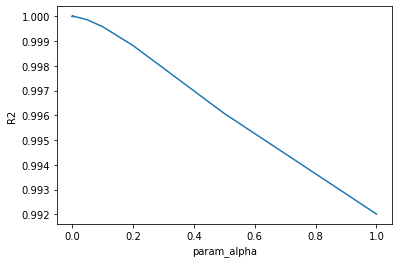

In [192]:
plt.plot(df_score['param_alpha'],df_score['mean_test_score'])
plt.xlabel("param_alpha")
plt.ylabel("R2")

In [149]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,shuffle=True)
# y_train = y_train.values.reshape(len(y_train),)
# y_test = y_test.values.reshape(len(y_test),)
# ridge_model = Ridge()
# model = ridge_model.fit(X_train,y_train)
# mse, bias, var = bias_variance_decomp(model, X_train.values, y_train, X_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)

In [150]:
print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

Average expected loss: 196721175.161
Average bias: 983605.876
Average variance: 195737569.285


In [102]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,shuffle=True)
# y_train = y_train.values.reshape(len(y_train),)
# y_test = y_test.values.reshape(len(y_test),)
# linear_model = LinearRegression()
# model = linear_model.fit(X_train,y_train)
# mse, bias, var = bias_variance_decomp(linear_model, X_train.values, y_train, X_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)

In [103]:
# print('Average expected loss: %.3f' % mse)
# print('Average bias: %.3f' % bias)
# print('Average variance: %.3f' % var)

Average expected loss: 196721175.161
Average bias: 983605.876
Average variance: 195737569.285


In [193]:
mse, bias, var = bias_variance_decomp(linear_model, X_train.values, y_train, X_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)

In [194]:
print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

Average expected loss: 0.000
Average bias: 0.000
Average variance: 0.000


In [202]:
mse, bias, var = bias_variance_decomp(ridge_model, X_train.values, y_train, X_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)

In [203]:
print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

Average expected loss: 0.000
Average bias: 0.000
Average variance: 0.000


In [204]:
mse, bias, var = bias_variance_decomp(lasso_model, X_train.values, y_train, X_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)

In [205]:
print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

Average expected loss: 21.687
Average bias: 19.020
Average variance: 2.667


In [206]:
mse, bias, var = bias_variance_decomp(elasticnet_model, X_train.values, y_train, X_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)

In [207]:
print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

Average expected loss: 20.886
Average bias: 17.996
Average variance: 2.891
